In [43]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
v = pd.read_csv("vecs_umap_9034.tsv", sep='\t', header=None)

m = pd.read_csv("meta_umap_9034.tsv", sep='\t')

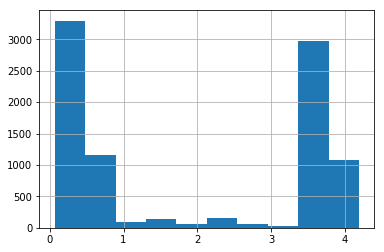

In [22]:
std_over_dims = v.var(1)

std_over_dims.hist()

In [51]:
sum_gt_mean = (v.sum(1) > v.sum(1).mean()).astype("int")
m["sum_gt_mean"] = sum_gt_mean

# KDTree

In [36]:
from sklearn.neighbors import KDTree

tree = KDTree(v.to_numpy(), metric="l2")

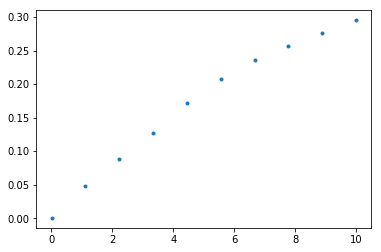

In [53]:
nums = tree.two_point_correlation(v.to_numpy(), r=np.linspace(0.01, 10.0, 10))
# nums = np.asarray([   31176,  3870740,  7206750, 10414634, 14059210, 16969958, 19304518, 20936522, 22536626, 24099338])

rel_nums = nums/(v.shape[0]**2)

plt.plot(np.linspace(0.01, 10.0, 10), rel_nums, ".")

In [64]:
neighbors = tree.query_radius(v.to_numpy(), 2.0, count_only=True)
m["n_neighbors"] = neighbors

In [57]:
# doesn't work
kernel_densities = tree.kernel_density(v.to_numpy(), 20 , kernel="gaussian")
kernel_densities.sum()

In [ ]:
terms = [""]

# KMeans

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, verbose=10).fit(v.to_numpy())
m["kmeans_clusters"] = kmeans.labels_

Initialization complete
Iteration 0, inertia 303304.27688947687
Iteration 1, inertia 247163.7325742022
Iteration 2, inertia 246173.47991204733
Iteration 3, inertia 245064.66841205358
Iteration 4, inertia 244625.20780210168
Iteration 5, inertia 244247.42874139777
Iteration 6, inertia 244213.78461615898
Iteration 7, inertia 244172.95218981634
Iteration 8, inertia 244171.59894497533
Iteration 9, inertia 244166.36188688566
Converged at iteration 9: center shift 6.902220888068708e-05 within tolerance 6.912042343671874e-05.
Initialization complete
Iteration 0, inertia 274398.1864715737
Iteration 1, inertia 225823.57714461163
Iteration 2, inertia 223892.41901886277
Iteration 3, inertia 223278.3384264233
Iteration 4, inertia 223134.99181058278
Iteration 5, inertia 223126.44581794803
Iteration 6, inertia 223126.1742827111
Iteration 7, inertia 223115.15896662275
Iteration 8, inertia 223056.9033090973
Iteration 9, inertia 223056.01553729564
Converged at iteration 9: strict convergence.
Initializa

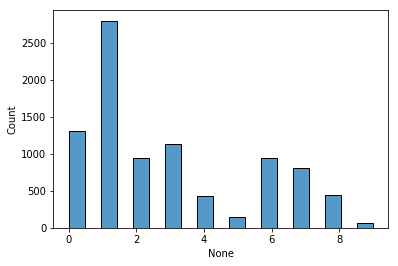

In [67]:
sns.histplot(kmeans.labels_)

In [65]:
m

,term,freq,kmeans_clusters,sum_gt_mean,n_neighbors
0,00,2.564949,7,1,387
1,000,1.945910,6,0,52
2,01,1.609438,7,1,374
3,02,1.791759,7,1,320
4,03,1.945910,3,0,10
...,...,...,...,...,...
9029,茂兵衛,0.693147,0,0,52
9030,藤原,0.000000,6,0,25
9031,観光丸,0.000000,6,0,25
9032,金地絵屏風,0.000000,6,0,25


In [82]:
# rs = np.random.randint(2, size=(4, v.shape[0]))
# for i, rv in enumerate(rs):
#     m["rand_"+str(i)] = rv

In [83]:
m.to_csv(f"meta_extra.tsv", sep="\t", index=False, header=True)

In [84]:
m

,term,freq,kmeans_clusters,sum_gt_mean,n_neighbors,rand_0,rand_1,rand_2,rand_3
0,00,2.564949,7,1,387,1,1,1,1
1,000,1.945910,6,0,52,1,0,1,1
2,01,1.609438,7,1,374,1,1,1,1
3,02,1.791759,7,1,320,0,1,0,0
4,03,1.945910,3,0,10,1,0,1,1
...,...,...,...,...,...,...,...,...,...
9029,茂兵衛,0.693147,0,0,52,0,0,0,1
9030,藤原,0.000000,6,0,25,1,0,1,1
9031,観光丸,0.000000,6,0,25,1,1,0,1
9032,金地絵屏風,0.000000,6,0,25,1,0,0,1
